In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_excel(r'C:\Users\Hi\Desktop\Absenteeism_at_work.xls')
df 

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


In [4]:
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

# Feature Engineering

In [6]:
df['absenteeism_category']=['not-absent' if period<=0 else 'extreme-late' if 0<period<7 else 'absent' if period>=7 else None \
                            for period in list(df['Absenteeism time in hours'].values)] # absenteeism category is the feature extracted from absenteeism in hours because the Target variable should be a categorical variable because this is a classification problem and not a regression problem

In [7]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,absenteeism_category
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,4,extreme-late
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,0,0,98,178,31,0,not-absent
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,extreme-late
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,68,168,24,4,extreme-late
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,2,extreme-late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,1,2,1,0,1,90,172,30,8,absent
736,1,11,7,3,1,235,11,14,37,264604,...,3,1,0,0,1,88,172,29,4,extreme-late
737,4,0,0,3,1,118,14,13,40,271219,...,1,1,1,0,8,98,170,34,0,not-absent
738,8,0,0,4,2,231,35,14,39,271219,...,1,2,1,0,2,100,170,35,0,not-absent


In [8]:
df=df.drop(['ID','Month of absence','Day of the week','Seasons'],axis=1)  # columns which are not required for analysis
df 

,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,absenteeism_category
0,26,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4,extreme-late
1,0,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0,not-absent
2,23,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2,extreme-late
3,7,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4,extreme-late
4,23,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2,extreme-late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,289,36,13,33,264604,93,0,1,2,1,0,1,90,172,30,8,absent
736,11,235,11,14,37,264604,93,0,3,1,0,0,1,88,172,29,4,extreme-late
737,0,118,14,13,40,271219,95,0,1,1,1,0,8,98,170,34,0,not-absent
738,0,231,35,14,39,271219,95,0,1,2,1,0,2,100,170,35,0,not-absent


# Exploratory Data Analysis

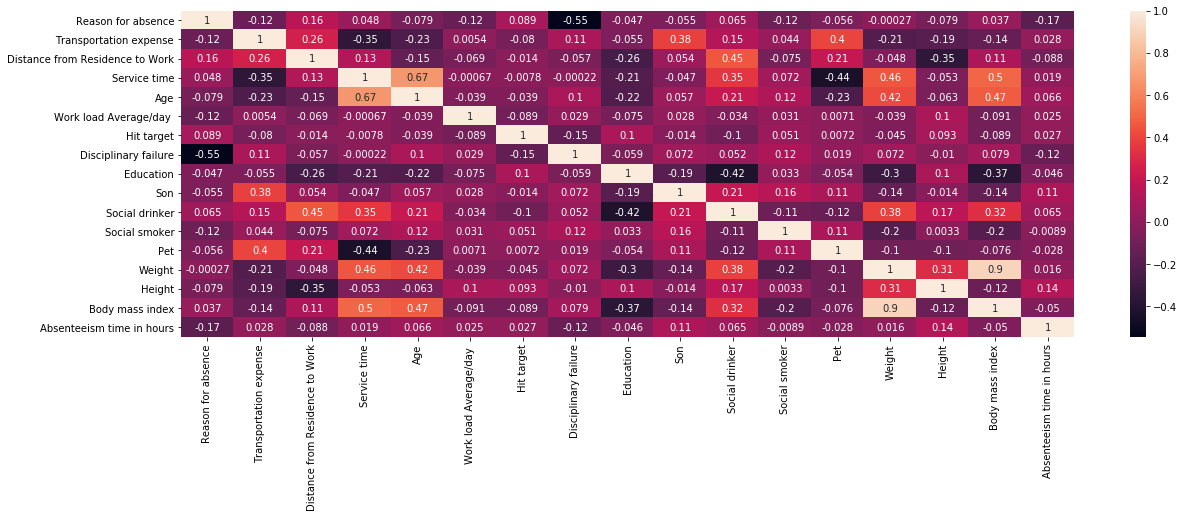

In [10]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True)  

# Univariate Analysis

{'bodies': [<matplotlib.collections.PolyCollection at 0x1bad5876208>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1bad586b988>,
 'cmins': <matplotlib.collections.LineCollection at 0x1bad5876b48>,
 'cbars': <matplotlib.collections.LineCollection at 0x1bad5876988>}

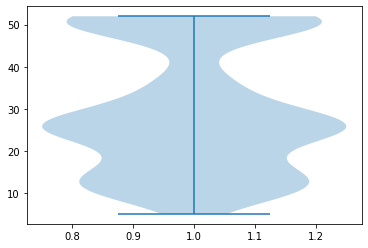

In [11]:
plt.violinplot(df['Distance from Residence to Work'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1bad533cec8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1bad5329588>,
 'cmins': <matplotlib.collections.LineCollection at 0x1bad5344dc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1bad5344f88>}

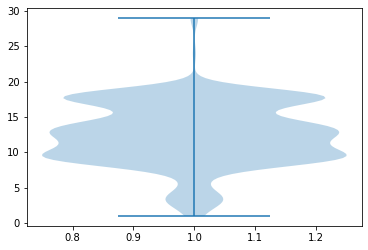

In [12]:
plt.violinplot(df['Service time'])

# Bivariate Analysis

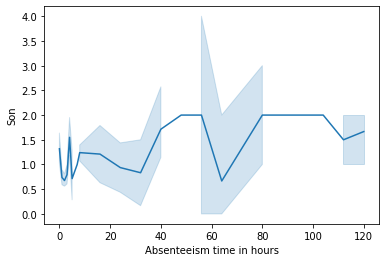

In [14]:
sns.lineplot(x='Absenteeism time in hours', y='Son', data=df) 

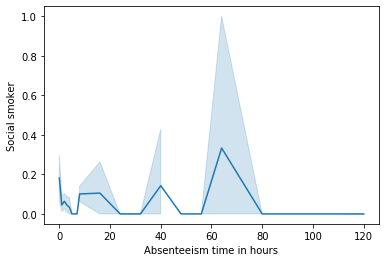

In [16]:
sns.lineplot(x='Absenteeism time in hours', y='Social smoker', data=df) 

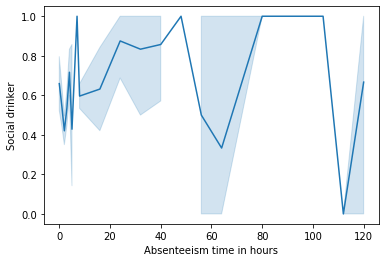

In [17]:
sns.lineplot(x='Absenteeism time in hours', y='Social drinker', data=df) 

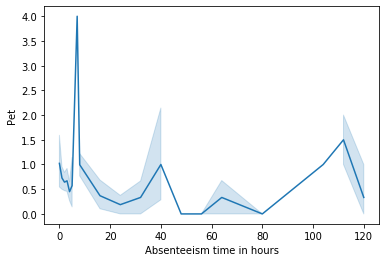

In [18]:
sns.lineplot(x='Absenteeism time in hours', y='Pet', data=df) 

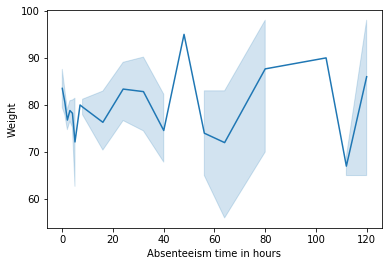

In [19]:
sns.lineplot(x='Absenteeism time in hours', y='Weight', data=df) 

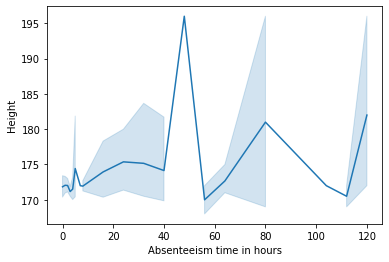

In [25]:
sns.lineplot(x='Absenteeism time in hours', y='Height', data=df) 

# Splitting data into target and input variables

In [16]:
df_x=df.drop('absenteeism_category',axis=1) 
df_x.head()   

,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,0,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,23,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,23,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


In [18]:
y=pd.DataFrame(df.absenteeism_category)
y.head() 

,absenteeism_category
0,extreme-late
1,not-absent
2,extreme-late
3,extreme-late
4,extreme-late


# Data Preprocessing

In [19]:
from sklearn.preprocessing import StandardScaler   # Applying Standard scaler
sc = StandardScaler()
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 
x

,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.804938,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.219511
1,-2.280124,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,1.473056,0.975828,1.009438,-0.519767
2,0.448970,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,0.774000,-0.350671,1.009438,-0.369639
3,-1.449530,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.857131,-0.682295,-0.625100,-0.219511
4,0.448970,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.369639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.618937,1.011408,0.429556,0.101770,-0.532868,-0.176427,-0.420423,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,0.080744
736,-0.974905,0.204318,-1.256585,0.329981,0.084950,-0.176427,-0.420423,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,0.696327,-0.019046,0.542427,-0.219511
737,-2.280124,-1.544379,-1.054248,0.101770,0.548314,-0.006949,0.109131,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,5.506478,1.473056,-0.350671,1.709954,-0.519767
738,-2.280124,0.144533,0.362110,0.329981,0.393859,-0.006949,0.109131,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.951940,1.628402,-0.350671,1.943459,-0.519767


In [20]:
from sklearn.preprocessing import LabelEncoder                    #Applying label encoder 
lb=LabelEncoder()
y['absenteeism_category']=pd.DataFrame(lb.fit_transform(y['absenteeism_category'])) 
y

,absenteeism_category
0,1
1,2
2,1
3,1
4,1
...,...
735,0
736,1
737,2
738,2


In [21]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [22]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [31]:
# as I got the highest accuracy score with respect to random state 90 in KNeighborsClassifier, so I fix the random state 90 for all the Models 
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=90,test_size=0.20) 

In [32]:
print(train_x.shape,test_x.shape) 

(592, 17) (148, 17)


In [33]:
print(train_y.shape,test_y.shape)

(592, 1) (148, 1)


# Applying Machine Learning Models

In [34]:
def max_accuracy_score(clf,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        train_x, test_x, train_y, test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        clf.fit(train_x,train_y)
        pre = clf.predict(test_x) 
        acc_scr=accuracy_score(test_y,pre)
        print("accuracy score corresponding to random state ",r_state,"is",acc_scr)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state,"is",max_acc_score)
    return final_r_state   

In [30]:
kn=KNeighborsClassifier(n_neighbors=15) 
r_state=max_accuracy_score(kn,x,y) 

accuracy score corresponding to random state  42 is 0.7297297297297297
accuracy score corresponding to random state  43 is 0.7905405405405406
accuracy score corresponding to random state  44 is 0.7635135135135135
accuracy score corresponding to random state  45 is 0.8108108108108109
accuracy score corresponding to random state  46 is 0.8040540540540541
accuracy score corresponding to random state  47 is 0.7905405405405406
accuracy score corresponding to random state  48 is 0.7364864864864865
accuracy score corresponding to random state  49 is 0.7837837837837838
accuracy score corresponding to random state  50 is 0.8040540540540541
accuracy score corresponding to random state  51 is 0.8108108108108109
accuracy score corresponding to random state  52 is 0.7635135135135135
accuracy score corresponding to random state  53 is 0.7635135135135135
accuracy score corresponding to random state  54 is 0.6824324324324325
accuracy score corresponding to random state  55 is 0.7567567567567568
accura

In [36]:
print('\n')
print('Model name - KNeighborsClassifier\n')
print('\n')
kn=KNeighborsClassifier(n_neighbors=15)  
kn.fit(train_x,train_y) 
pre=kn.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(kn, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - KNeighborsClassifier



Accuracy_score =  0.8513513513513513


Cross_Val_Score =  0.7500000000000001


classification_report
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        55
           1       0.82      0.93      0.87        80
           2       1.00      1.00      1.00        13

    accuracy                           0.85       148
   macro avg       0.90      0.88      0.88       148
weighted avg       0.85      0.85      0.85       148



confusion matrix
 [[39 16  0]
 [ 6 74  0]
 [ 0  0 13]]




In [37]:
print('\n')
print('Model name - SupportVectorClassifier\n')
print('\n')
sv=SVC(C=10,kernel='rbf') 
sv.fit(train_x,train_y)
pre=sv.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS) 
print('\n')
sc = cross_val_score(sv, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - SupportVectorClassifier



Accuracy_score=  1.0


Cross_Val_Score =  0.9594594594594597


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        13

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



confusion matrix
 [[55  0  0]
 [ 0 80  0]
 [ 0  0 13]]




In [38]:
print('\n')
print('Model name - DecisionTreeClassifier\n')
print('\n')
dt=DecisionTreeClassifier(criterion='gini') 
dt.fit(train_x,train_y)
pre=dt.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)  
print('\n')
sc = cross_val_score(dt, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - DecisionTreeClassifier



Accuracy_score=  1.0


Cross_Val_Score =  0.9986486486486486


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        13

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



confusion matrix
 [[55  0  0]
 [ 0 80  0]
 [ 0  0 13]]




In [39]:
print('\n')
print('Model name - RandomForestClassifier\n')
print('\n')
rfc=RandomForestClassifier(criterion='gini',n_estimators=1000) 
rfc.fit(train_x,train_y) 
pre=rfc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(rfc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - RandomForestClassifier



Accuracy_score=  1.0


Cross_Val_Score =  0.9986486486486486


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        13

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



confusion matrix
 [[55  0  0]
 [ 0 80  0]
 [ 0  0 13]]




In [41]:
print('\n')
print('Model name - GradientBoostingClassifier\n')
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.001, n_estimators=900) 
gbc.fit(train_x,train_y)
pre=gbc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(gbc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - GradientBoostingClassifier



Accuracy_score=  1.0


Cross_Val_Score =  0.9986486486486486


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        13

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



confusion matrix
 [[55  0  0]
 [ 0 80  0]
 [ 0  0 13]]




In [43]:
print('\n')
print('Model name - AdaBoost Classifier\n')
print('\n')
adc=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=10,algorithm='SAMME')
adc.fit(train_x,train_y)
pre=adc.predict(test_x)  
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(adc, x, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - AdaBoost Classifier



Accuracy_score=  1.0


Cross_Val_Score =  1.0


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        13

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



confusion matrix
 [[55  0  0]
 [ 0 80  0]
 [ 0  0 13]]




In [44]:
print('\n')
print('Model name - XGBoost Classifier\n')
print('\n')
xgb=XGBClassifier(alpha=1, max_depth=6)
xgb.fit(train_x,train_y)
pre=xgb.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(xgb, x, y, cv=10, scoring='accuracy').mean() 
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y,pre))
print('\n')
cm=confusion_matrix(test_y,pre)
print('confusion matrix\n',cm)
print('\n')



Model name - XGBoost Classifier



Accuracy_score=  1.0


Cross_Val_Score =  0.9986486486486486


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        13

    accuracy                           1.00       148
   macro avg       1.00      1.00      1.00       148
weighted avg       1.00      1.00      1.00       148



confusion matrix
 [[55  0  0]
 [ 0 80  0]
 [ 0  0 13]]




In [47]:
# Here AdaBoost Classifier is working best with an Accuracy Score of 1.0 and Cross_Val_score of 1.0 so I am saving the Model
import joblib
joblib.dump(adc, 'AdaBoostClassifier_Absenteeism_at_work.pkl') 

['AdaBoostClassifier_Absenteeism_at_work.pkl']